# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [76]:
import math

def det(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0]) <= 0

def getFirstPoint(inputSet):
    i = 0
    firstPoint = [32767, 32767]
    while i < len(inputSet):
        if inputSet[i][1] < firstPoint[1]:
            firstPoint = inputSet[i]
        elif inputSet[i][1] == firstPoint[1] and inputSet[i][0] < firstPoint[0]:
            firstPoint = inputSet[i]
        i += 1
    return firstPoint

def calcAngle(point):
    y = point[1] - anchor[1]
    x = point[0] - anchor[0]
    angle = math.atan2(y, x)
    return angle

def calcDistance(point):
    y = point[1] - anchor[1]
    x = point[0] - anchor[0]
    distance = x ** 2 + y ** 2
    return distance

def sorterKey(item):
    angle = calcAngle(item)
    distance = calcDistance(item)
    return (angle, distance)

def sortByAngle(inputSet):
    return sorted(inputSet, key=sorterKey)

# added heuristic
def trimSet(inputSet):
    boundaries = removalBoundaries(inputSet)
    trimmedSet = []
    for i in inputSet:
        if not inRemovalArea(i, boundaries):
            trimmedSet.append(i)
    return trimmedSet

def inRemovalArea(point, boundaries):
    return boundaries[0] <= point[0] <= boundaries[1] and boundaries[3] <= point[1] <= boundaries[2]

def removalBoundaries(inputSet):
    i = 0
    bottomLeft = [32767, 32767]
    bottomRight = [0, 32767]
    topRight = [0, 0]
    topLeft = [32767, 0]
    while i < len(inputSet):
        if inputSet[i][0] + inputSet[i][1] < bottomLeft[0] + bottomLeft[1]:
            bottomLeft = inputSet[i]
        if inputSet[i][0] + inputSet[i][1] > topRight[0] + topRight[1]:
            topRight = inputSet[i]
        if inputSet[i][1] - inputSet[i][0] > topLeft[1] - topLeft[0]:
            topLeft = inputSet[i]
        if inputSet[i][1] - inputSet[i][0] < bottomRight[1] - bottomRight[0]:
            bottomRight = inputSet[i]
        i += 1
        if bottomLeft[0] < topLeft[0]:
            left = bottomLeft[0]
        else:
            left = topLeft[0]
        if bottomRight[0] > topRight[0]:
            right = bottomRight[0]
        else:
            right = topRight[0]
        if topLeft[1] > topRight[1]:
            top = topLeft[1]
        else:
            top = topRight[1]
        if bottomLeft[1] < bottomRight[1]:
            bottom = bottomLeft[1]
        else:
            bottom = bottomRight[1]
        return [left, right, top, bottom]

def extendedgrahamscan(inputSet):
    global anchor
    anchor = getFirstPoint(inputSet)
    if len(inputSet) > 9:
        inputSet = trimSet(inputSet)
        sortedSet = sortByAngle(inputSet)
        outputSet = [anchor, sortedSet[1]]
    for i in sortedSet[2:]:
        while len(outputSet) > 1 and det(outputSet[-2], outputSet[-1], i):
            del outputSet[-1]
        outputSet.append(i)
    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [110]:
import random

#code for random data generation
def randomPoints(n):
    randPoints = []
    while len(randPoints) < n:
        point = (random.randrange(0,32767), random.randrange(0,32767))
        if point not in randPoints:
            randPoints.append(point)
    return randPoints

#code for worst case data generation

# the worst-case scenario for our extended graham scan is dependant on the sorting 
# algorithm used and since we have chosen to use timsort, which has the same complexity in 
# both the average and worst-case, there is no separate function for generating worst case data.

Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [112]:
import timeit

#test code
N = 100
inputSet = randomPoints(N)

def timer():
    extendedgrahamscan(inputSet)

t = timeit.timeit("timer()", setup="from __main__ import timer", number=100)

print(t/100)

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

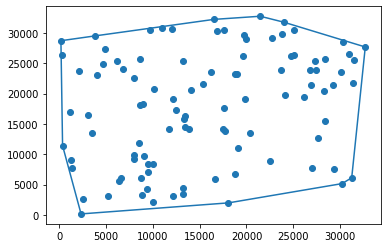

In [114]:
import matplotlib.pyplot as plt

inputSet = randomPoints(100)
outputSet = extendedgrahamscan(inputSet)

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 